# Car Price Predcition With Machine Learning


The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.



## Import necessary libraries


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import joblib

## Loading the dataset

In [116]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Exploring the dataset

In [117]:
#first five values
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [119]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [120]:
df.describe(include='all')


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


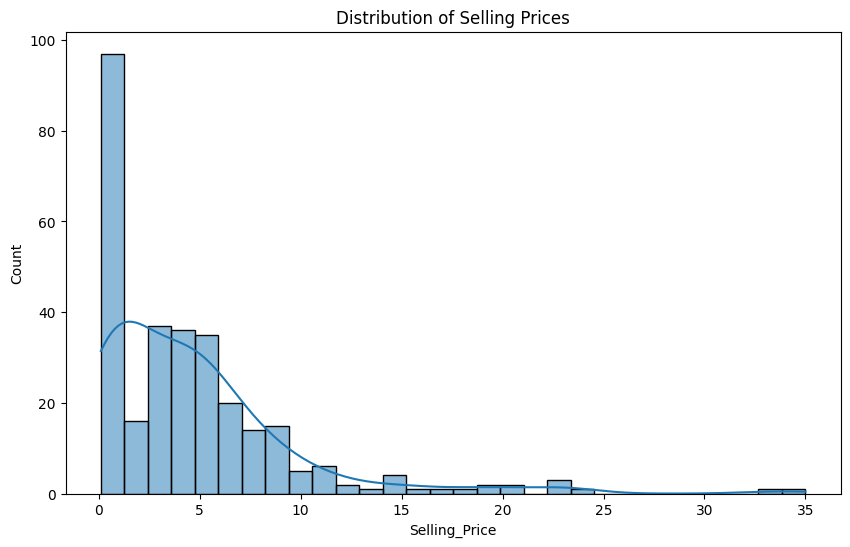

In [121]:
# Step 4: Visualize the target variable (Selling_Price)
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Selling Prices')
plt.show()

In [122]:
# checking missing value
df.isna().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## Feature extraction

In [123]:
# Create a new feature 'Car_Age'
current_year = 2023  # Assuming the current year is 2023
df['Car_Age'] = current_year - df['Year']
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


## Explore the distribution of numerical features


In [124]:
plt.figure(figsize=(15, 8))


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

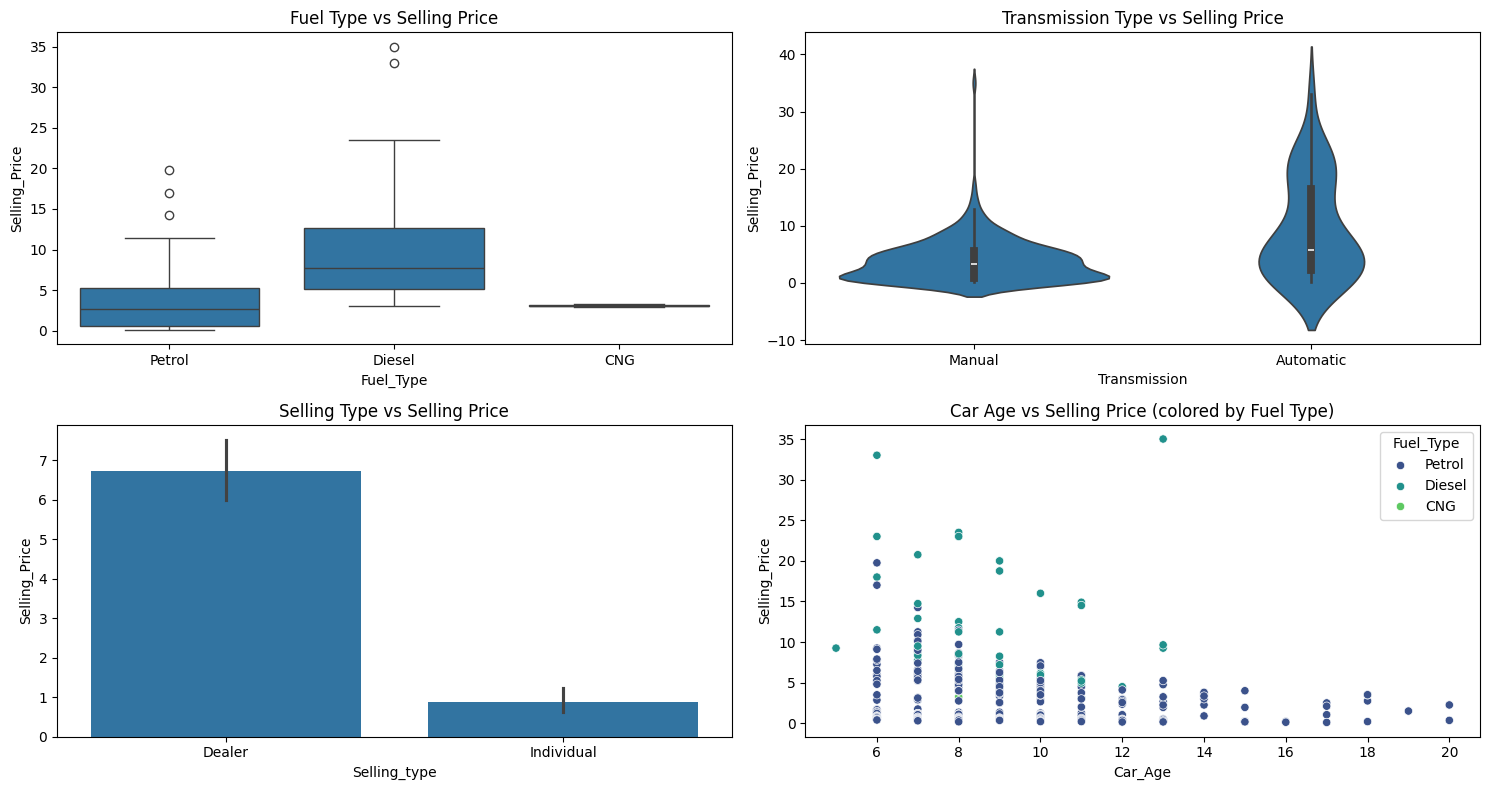

In [125]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Fuel Type vs Selling Price')

plt.subplot(2, 2, 2)
sns.violinplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Transmission Type vs Selling Price')

plt.subplot(2, 2, 3)
sns.barplot(x='Selling_type', y='Selling_Price', data=df)
plt.title('Selling Type vs Selling Price')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Car_Age', y='Selling_Price', data=df, hue='Fuel_Type', palette='viridis')
plt.title('Car Age vs Selling Price (colored by Fuel Type)')

plt.tight_layout()
plt.show()

* selling price is more in diesel fuel type compare to cng and petrol
* Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals 
* It can be observed that Selling Price would be higher for cars that are Automatic. 



In [126]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


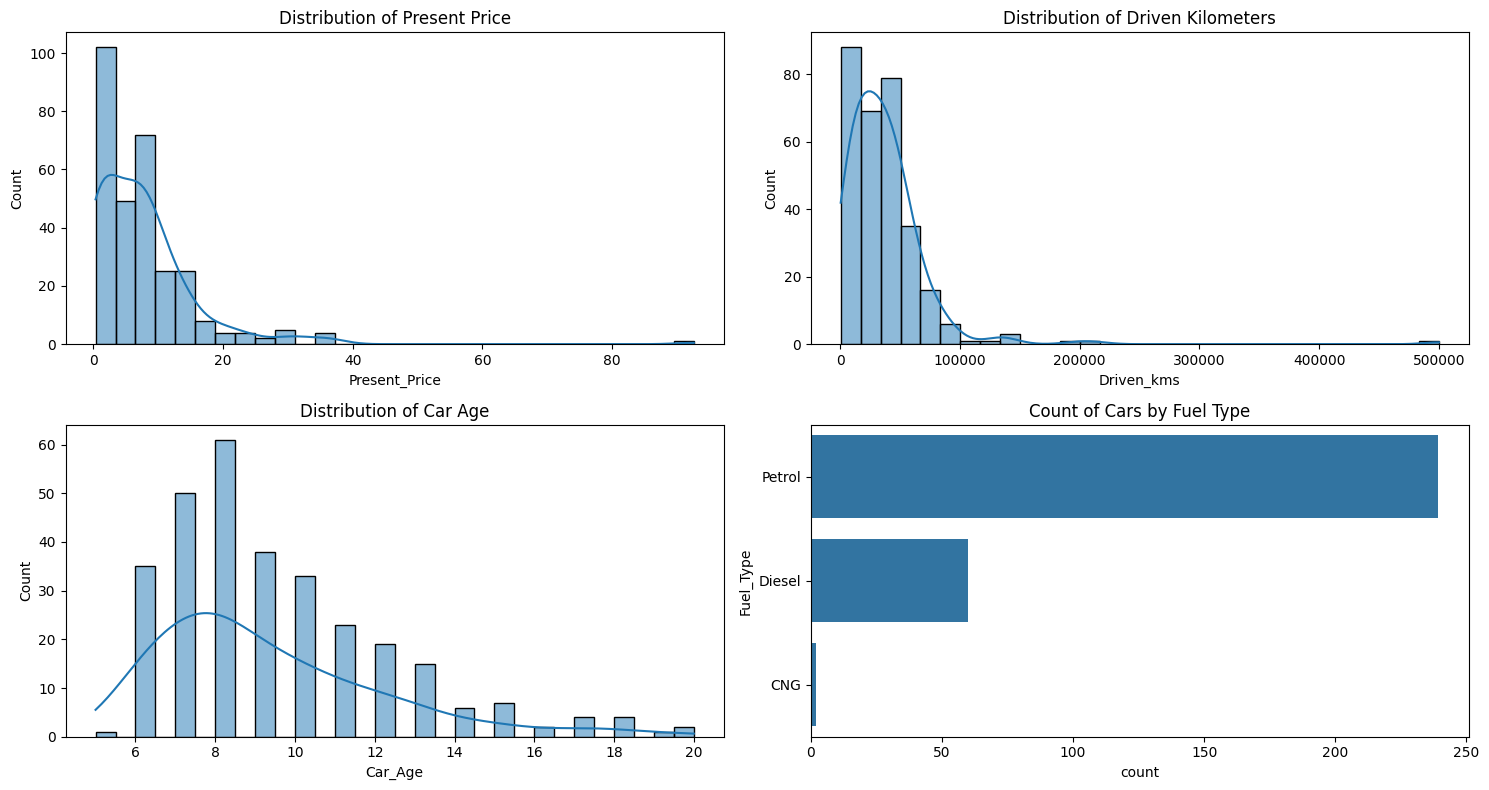

In [127]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Present_Price'], bins=30, kde=True)
plt.title('Distribution of Present Price')

plt.subplot(2, 2, 2)
sns.histplot(df['Driven_kms'], bins=30, kde=True)
plt.title('Distribution of Driven Kilometers')

plt.subplot(2, 2, 3)
sns.histplot(df['Car_Age'], bins=30, kde=True)
plt.title('Distribution of Car Age')

plt.subplot(2, 2, 4)
sns.countplot(df['Fuel_Type'])
plt.title('Count of Cars by Fuel Type')

plt.tight_layout()
plt.show()

In [128]:
# Here's our categorical column
print(df['Fuel_Type'].unique())
print(df['Selling_type'].unique())
print(df['Transmission'].unique())
print(df['Car_Name'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [129]:
# In Car Name column There are three hundred and twelve unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
df = df.drop(labels='Car_Name', axis=1)
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [130]:
# Dealing With Categorical Variables, creagting dummie
clean_data = pd.get_dummies(df,drop_first=True)
clean_data.head()


,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,9,0,1,0,1
1,2013,4.75,9.54,43000,0,10,1,0,0,1
2,2017,7.25,9.85,6900,0,6,0,1,0,1
3,2011,2.85,4.15,5200,0,12,0,1,0,1
4,2014,4.60,6.87,42450,0,9,1,0,0,1


## Checking Multicollinearity Using VIF


In [136]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Driven_kms','Owner','Car_Age','Fuel_Type_Diesel',
                        'Fuel_Type_Petrol','Selling_type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.211044,Present_Price
1,2.888998,Driven_kms
2,1.086964,Owner
3,16.194782,Car_Age
4,5.395420,Fuel_Type_Diesel
5,16.933491,Fuel_Type_Petrol
6,2.231970,Selling_type_Individual
7,8.440614,Transmission_Manual


In [138]:
# Car_age nd fuel_type_petrol feature has high VIF
data_no_multicolinearity = clean_data.drop(['Driven_kms','Fuel_Type_Petrol'],axis=1)


In [139]:
# cheking again after removing some correlated feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Owner','Car_Age','Fuel_Type_Diesel',
                        'Selling_type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.700202,Present_Price
1,1.079020,Owner
2,7.317385,Car_Age
3,1.655711,Fuel_Type_Diesel
4,1.958923,Selling_type_Individual
5,5.153375,Transmission_Manual


## Feature Selection


<Axes: >

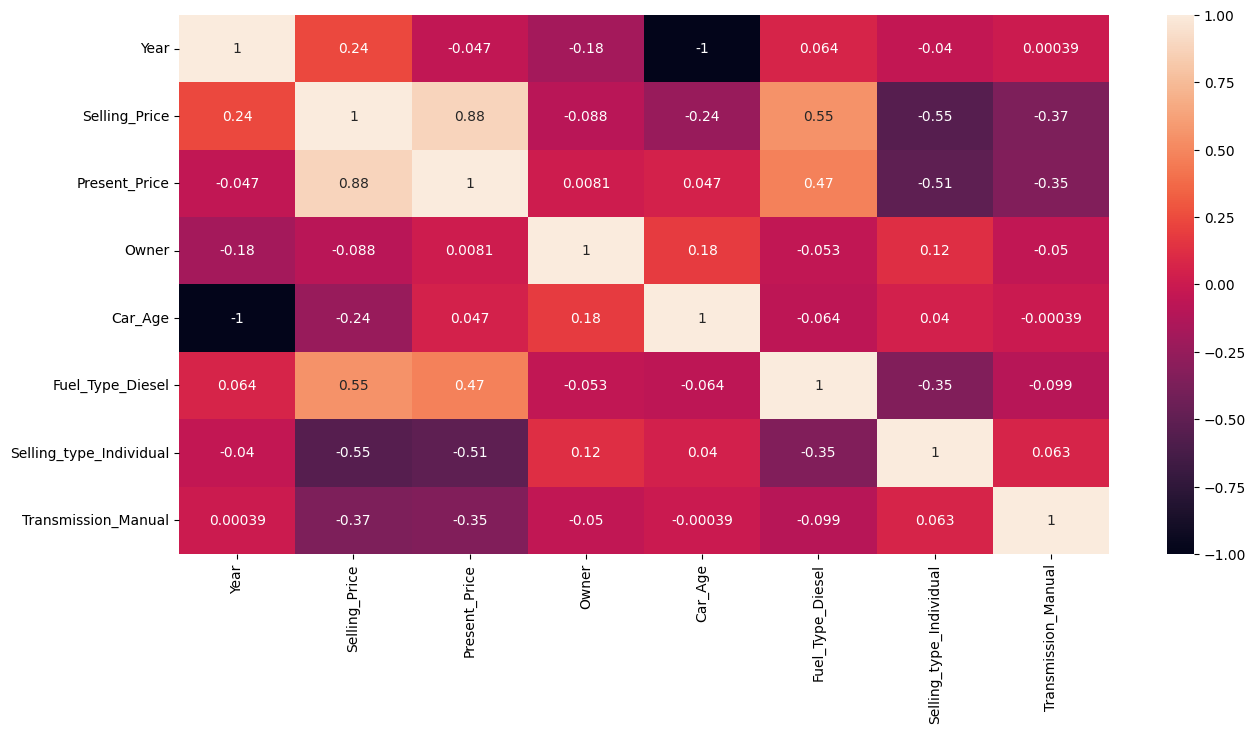

In [140]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)


In [141]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('Selling_Price',axis=1)
y = data_no_multicolinearity['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3)

array([0.   , 0.   , 0.126, 0.   , 0.   , 0.   , 0.   ])

In [144]:
# Creating summary table
model_summry = pd.DataFrame(data=['Present_Price', 'Owner', 'Car_Age', 'Fuel_Type_Diesel','','Selling_type_Individual', 'Transmission_Manual'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry.head()

,Features,p-values
0,Present_Price,0.000
1,Owner,0.000
2,Car_Age,0.126
3,Fuel_Type_Diesel,0.000
4,,0.000


## Feature Importance



In [145]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

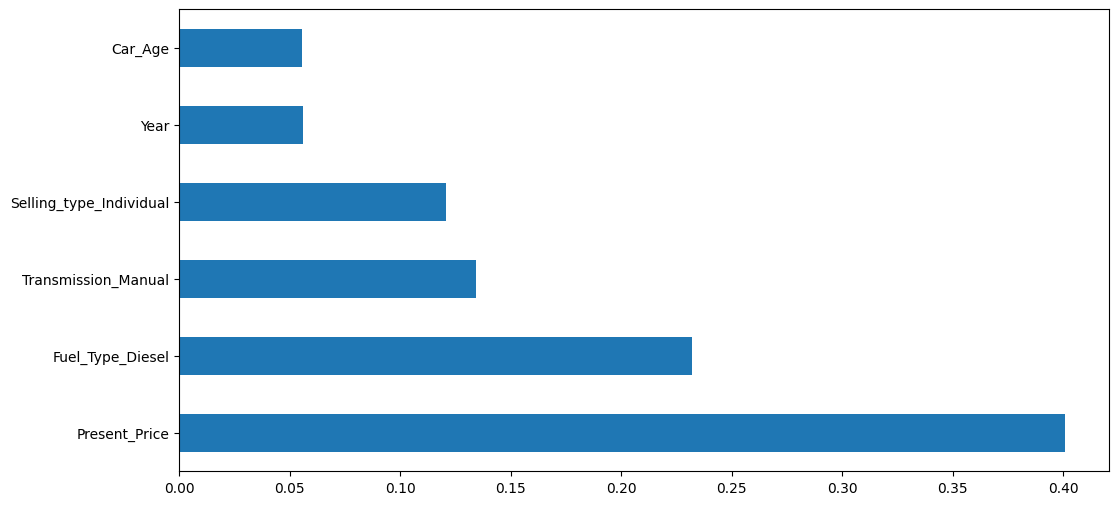

In [146]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [147]:
print(feat_importances.sort_values(ascending=False))


Present_Price              0.400649
Fuel_Type_Diesel           0.232151
Transmission_Manual        0.134156
Selling_type_Individual    0.120649
Year                       0.056048
Car_Age                    0.055429
Owner                      0.000918
dtype: float64


In [148]:
data_no_multicolinearity.columns


Index(['Year', 'Selling_Price', 'Present_Price', 'Owner', 'Car_Age',
       'Fuel_Type_Diesel', 'Selling_type_Individual', 'Transmission_Manual'],
      dtype='object')

In [151]:
# Selecting useful features.
final_df = data_no_multicolinearity[['Selling_Price', 'Present_Price', 'Car_Age',
       'Fuel_Type_Diesel', 'Selling_type_Individual', 'Transmission_Manual']]
final_df.head()


,Selling_Price,Present_Price,Car_Age,Fuel_Type_Diesel,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,9,0,0,1
1,4.75,9.54,10,1,0,1
2,7.25,9.85,6,0,0,1
3,2.85,4.15,12,0,0,1
4,4.60,6.87,9,1,0,1


## Model Development



In [152]:
## Declaring dependent and independent variable
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']


In [153]:
## Feature Scaling
# feature scallng on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price','Car_Age']])


StandardScaler()

In [154]:
input_scaled = scaler.transform(X[['Present_Price','Car_Age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_Age'])


In [156]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_Age'],axis=1))


## Training and Testing Data


In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)


## Linear Regression Model


In [161]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [162]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)


R_squared : 0.8406852328957871


## Random Forest Regressor Model


In [163]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)

R_squared : 0.9266429592349082


## GBT Regressor Model

In [164]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)


R_squared : 0.8920877935530354


*So as we try diferent Regression Alorithms and found that "Random Forest Regressor Model" is giving better accuracy compare to other.*



## Hyperparameter optimization using RandomizedSearchCV


In [167]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [168]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [169]:
rf_random.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\USER\anaconda3\envs\my_environment\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\my_environment\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\envs\my_environment\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\anaconda3\envs\my_environment\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [170]:
rf_random.best_params_
    

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [171]:
predictions=rf_random.predict(x_test)


In [172]:
r_squared = r2_score(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("R_squared :",r_squared)


R_squared : 0.8088499472146674


## Save the model to reuse it again


In [173]:
'''
# save the model to disk
import pickle
pickle.dump(rf_random, open('rf_model', 'wb'))

# load the model from disk
loaded_model = pickle.load(open('rf_model','rb'))
'''

"\n# save the model to disk\nimport pickle\npickle.dump(rf_random, open('rf_model', 'wb'))\n\n# load the model from disk\nloaded_model = pickle.load(open('rf_model','rb'))\n"

## Test the model by giving input


In [174]:
def prediction(PresentPrice, CarAge, FuelType,SellerType, Transmissionmanual):
    # feature scaling on present price and car age
    scaled_value = scaler.transform([[float(PresentPrice), int(CarAge)]])
    
    price = scaled_value[0,0]
    age = scaled_value[0,1]
    
    fuel = int(FuelType)
    Seller = int(SellerType)
    trans = int(Transmissionmanual)
    
    return rf_random.predict([[price, age, fuel, Seller, trans]])


In [175]:
prediction(25, 14, 0, 2, 0)


C:\Users\USER\anaconda3\envs\my_environment\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\envs\my_environment\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.45192])

In [176]:
prediction(23.73, 14, 0, 1,0)


C:\Users\USER\anaconda3\envs\my_environment\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\envs\my_environment\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.30903667])

# Conclusions

After conducting a comprehensive analysis of the dataset, the following conclusions can be drawn:

1. **Present Price Impact:**
   - The present price of a car is a crucial factor in predicting its selling price.
   - As the present price increases, the selling price tends to increase gradually.

2. **Car Age Effect:**
   - Car age has a negative impact on the selling price.
   - Older cars are associated with lower selling prices.

3. **Fuel Type Influence:**
   - Cars with a fuel type of Diesel generally command higher selling prices.

4. **Transmission Type:**
   - Cars with manual transmission are priced lower compared to those with automatic transmission.

5. **Selling Type Impact:**
   - Cars sold by individuals tend to have lower selling prices compared to those sold by dealers.

These insights provide valuable information for understanding the factors influencing the selling price of cars. Further exploration and analysis could focus on specific car models, additional features, or external factors that may contribute to variations in selling prices.
